In [34]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# 1. Load the data and select the features
data = pd.read_csv('./dataset/kerala_flood.csv')

In [68]:
# data.head()
# data.info()

In [113]:
# 2. Split the data into training and testing sets
X = data[['YEAR','ANNUAL','avgjune']] # Features to train the model
y = data['flood'] # Models Target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [115]:
# 3. Using K Nearest neighbours
model = KNeighborsClassifier(n_neighbors=1)


In [117]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [119]:
predictions = model.predict(X_test)

In [121]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[28  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.83      0.83      0.83         6

    accuracy                           0.94        35
   macro avg       0.90      0.90      0.90        35
weighted avg       0.94      0.94      0.94        35



In [123]:
# You can use another better k value
# Use elbow method to choose correct k value
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)   
    error_rate.append(np.mean(pred_i != y_test))


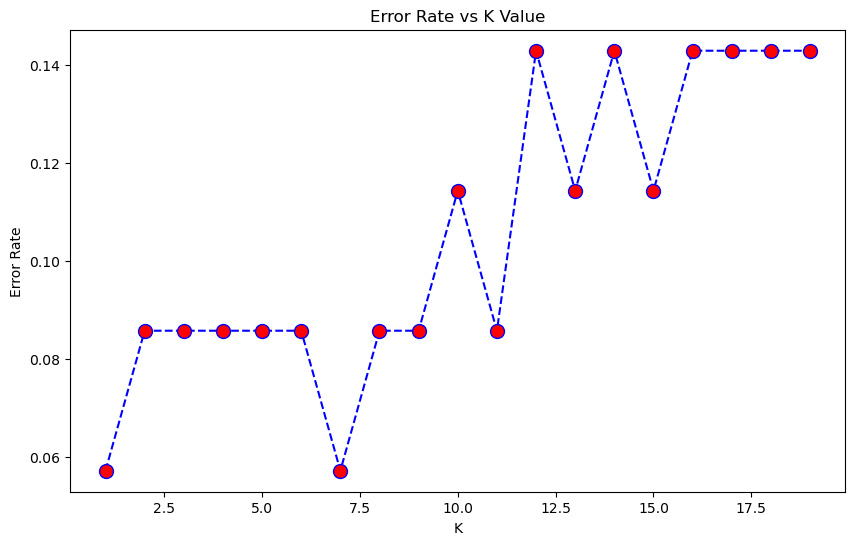

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [133]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[28  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.83      0.83      0.83         6

    accuracy                           0.94        35
   macro avg       0.90      0.90      0.90        35
weighted avg       0.94      0.94      0.94        35

